In [1]:
import os
from keras.applications.vgg19 import VGG19
from keras.preprocessing import image
from keras.applications.vgg19 import preprocess_input
from keras.models import Model
import numpy as np


In [2]:
from scipy.io.wavfile import read
import matplotlib.pyplot as plt
from os import walk
import os

In [5]:
if not os.path.exists("cough_negPlots"):
    os.makedirs("cough_negPlots")
car_wavs = []
for (_,_,filenames) in walk('C:/Users/yajwi/OneDrive/Desktop/Udacity-ML-Capstone-master/Notebooks/clinical/converted_seg/cneg'):
    car_wavs.extend(filenames)
    print(filenames)
    break

['neg-0421-083-cough-m-53-0.wav', 'neg-0421-083-cough-m-53-1.wav', 'neg-0421-083-cough-m-53-10.wav', 'neg-0421-083-cough-m-53-11.wav', 'neg-0421-083-cough-m-53-12.wav', 'neg-0421-083-cough-m-53-13.wav', 'neg-0421-083-cough-m-53-14.wav', 'neg-0421-083-cough-m-53-15.wav', 'neg-0421-083-cough-m-53-16.wav', 'neg-0421-083-cough-m-53-17.wav', 'neg-0421-083-cough-m-53-2.wav', 'neg-0421-083-cough-m-53-3.wav', 'neg-0421-083-cough-m-53-4.wav', 'neg-0421-083-cough-m-53-5.wav', 'neg-0421-083-cough-m-53-6.wav', 'neg-0421-083-cough-m-53-7.wav', 'neg-0421-083-cough-m-53-8.wav', 'neg-0421-083-cough-m-53-9.wav', 'neg-0421-085-cough-m-43-1.wav', 'neg-0421-085-cough-m-43-2.wav', 'neg-0421-088-cough-f-66-0.wav', 'neg-0421-088-cough-f-66-1.wav', 'neg-0421-088-cough-f-66-2.wav', 'neg-0421-088-cough-f-66-3.wav', 'neg-0421-088-cough-f-66-4.wav', 'neg-0421-088-cough-f-66-5.wav', 'neg-0421-088-cough-f-66-6.wav', 'neg-0421-088-cough-f-66-8.wav', 'neg-0421-089-cough-f-20-0.wav', 'neg-0421-089-cough-f-20-2.wav', '

In [6]:
car_wavs

['neg-0421-083-cough-m-53-0.wav',
 'neg-0421-083-cough-m-53-1.wav',
 'neg-0421-083-cough-m-53-10.wav',
 'neg-0421-083-cough-m-53-11.wav',
 'neg-0421-083-cough-m-53-12.wav',
 'neg-0421-083-cough-m-53-13.wav',
 'neg-0421-083-cough-m-53-14.wav',
 'neg-0421-083-cough-m-53-15.wav',
 'neg-0421-083-cough-m-53-16.wav',
 'neg-0421-083-cough-m-53-17.wav',
 'neg-0421-083-cough-m-53-2.wav',
 'neg-0421-083-cough-m-53-3.wav',
 'neg-0421-083-cough-m-53-4.wav',
 'neg-0421-083-cough-m-53-5.wav',
 'neg-0421-083-cough-m-53-6.wav',
 'neg-0421-083-cough-m-53-7.wav',
 'neg-0421-083-cough-m-53-8.wav',
 'neg-0421-083-cough-m-53-9.wav',
 'neg-0421-085-cough-m-43-1.wav',
 'neg-0421-085-cough-m-43-2.wav',
 'neg-0421-088-cough-f-66-0.wav',
 'neg-0421-088-cough-f-66-1.wav',
 'neg-0421-088-cough-f-66-2.wav',
 'neg-0421-088-cough-f-66-3.wav',
 'neg-0421-088-cough-f-66-4.wav',
 'neg-0421-088-cough-f-66-5.wav',
 'neg-0421-088-cough-f-66-6.wav',
 'neg-0421-088-cough-f-66-8.wav',
 'neg-0421-089-cough-f-20-0.wav',
 'neg-

In [8]:
for car_wav in car_wavs:
    # read audio samples
    input_data = read("C:/Users/yajwi/OneDrive/Desktop/Udacity-ML-Capstone-master/Notebooks/clinical/converted_seg/cneg/" + car_wav)
    audio = input_data[1]
    # plot the first 1024 samples
    plt.plot(audio)
    # label the axes
    plt.ylabel("Amplitude")
    plt.xlabel("Time")
    # set the title
    # plt.title("Sample Wav")
    # display the plot
    plt.savefig("cough_negPlots/" + car_wav.split('.')[0] + '.png')
    # plt.show()
    plt.close('all')

In [10]:
# for pos 
if not os.path.exists("cough_posPlots"):
    os.makedirs("cough_posPlots")
car_wavs = []
for (_,_,filenames) in walk('C:/Users/yajwi/OneDrive/Desktop/Udacity-ML-Capstone-master/Notebooks/clinical/converted_seg/cpos'):
    car_wavs.extend(filenames)
    break

In [11]:
for car_wav in car_wavs:
    # read audio samples
    input_data = read("C:/Users/yajwi/OneDrive/Desktop/Udacity-ML-Capstone-master/Notebooks/clinical/converted_seg/cpos/" + car_wav)
    audio = input_data[1]
    # plot the first 1024 samples
    plt.plot(audio)
    # label the axes
    plt.ylabel("Amplitude")
    plt.xlabel("Time")
    # set the title
    # plt.title("Sample Wav")
    # display the plot
    plt.savefig("cough_posPlots/" + car_wav.split('.')[0] + '.png')
    # plt.show()
    plt.close('all')

In [12]:
base_model = VGG19(weights='imagenet')
model = Model(inputs=base_model.input, outputs=base_model.get_layer('flatten').output)

574717952/574710816 [==============================] - 134s 0us/step


In [13]:
def get_features(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    flatten = model.predict(x)
    return list(flatten[0])

In [14]:
X = []
y = []

In [15]:
car_plots = []
for (_,_,filenames) in os.walk('cough_negPlots'):
    car_plots.extend(filenames)
    break

In [16]:
car_plots

['neg-0421-083-cough-m-53-0.png',
 'neg-0421-083-cough-m-53-1.png',
 'neg-0421-083-cough-m-53-10.png',
 'neg-0421-083-cough-m-53-11.png',
 'neg-0421-083-cough-m-53-12.png',
 'neg-0421-083-cough-m-53-13.png',
 'neg-0421-083-cough-m-53-14.png',
 'neg-0421-083-cough-m-53-15.png',
 'neg-0421-083-cough-m-53-16.png',
 'neg-0421-083-cough-m-53-17.png',
 'neg-0421-083-cough-m-53-2.png',
 'neg-0421-083-cough-m-53-3.png',
 'neg-0421-083-cough-m-53-4.png',
 'neg-0421-083-cough-m-53-5.png',
 'neg-0421-083-cough-m-53-6.png',
 'neg-0421-083-cough-m-53-7.png',
 'neg-0421-083-cough-m-53-8.png',
 'neg-0421-083-cough-m-53-9.png',
 'neg-0421-085-cough-m-43-1.png',
 'neg-0421-085-cough-m-43-2.png',
 'neg-0421-088-cough-f-66-0.png',
 'neg-0421-088-cough-f-66-1.png',
 'neg-0421-088-cough-f-66-2.png',
 'neg-0421-088-cough-f-66-3.png',
 'neg-0421-088-cough-f-66-4.png',
 'neg-0421-088-cough-f-66-5.png',
 'neg-0421-088-cough-f-66-6.png',
 'neg-0421-088-cough-f-66-8.png',
 'neg-0421-089-cough-f-20-0.png',
 'neg-

In [17]:
for cplot in car_plots:
    X.append(get_features('cough_negPlots/' + cplot))
    y.append(0)

In [31]:
bike_plots = []
for (_,_,filenames) in os.walk('cough_posPlots'):
    bike_plots.extend(filenames)
    break

In [32]:
bike_plots

['pos-0421-084-cough-m-50-0.png',
 'pos-0421-084-cough-m-50-1.png',
 'pos-0421-084-cough-m-50-2.png',
 'pos-0421-084-cough-m-50-3.png',
 'pos-0421-084-cough-m-50-4.png',
 'pos-0421-084-cough-m-50-5.png',
 'pos-0421-084-cough-m-50-6.png',
 'pos-0421-084-cough-m-50-7.png',
 'pos-0421-086-cough-m-65-0.png',
 'pos-0421-086-cough-m-65-1.png',
 'pos-0421-086-cough-m-65-2.png',
 'pos-0421-086-cough-m-65-3.png',
 'pos-0421-086-cough-m-65-4.png',
 'pos-0421-086-cough-m-65-5.png',
 'pos-0421-086-cough-m-65-6.png',
 'pos-0421-086-cough-m-65-7.png',
 'pos-0421-086-cough-m-65-8.png',
 'pos-0421-087-cough-f-40-0.png',
 'pos-0421-087-cough-f-40-1.png',
 'pos-0421-087-cough-f-40-2.png',
 'pos-0421-087-cough-f-40-3.png',
 'pos-0421-087-cough-f-40-5.png',
 'pos-0421-087-cough-f-40-6.png',
 'pos-0421-092-cough-m-53-0.png',
 'pos-0421-092-cough-m-53-1.png',
 'pos-0421-092-cough-m-53-12.png',
 'pos-0421-092-cough-m-53-13.png',
 'pos-0421-092-cough-m-53-3.png',
 'pos-0421-092-cough-m-53-5.png',
 'pos-0421-0

In [33]:
for cplot in bike_plots:
    X.append(get_features('cough_posPlots/' + cplot))
    y.append(1)

In [34]:
y

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1]

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42, stratify=y)

In [37]:
clf = LinearSVC(random_state=0, tol=1e-5)
clf.fit(X_train, y_train)

LinearSVC(random_state=0, tol=1e-05)

In [38]:
predicted = clf.predict(X_test)

# get the accuracy
print (accuracy_score(y_test, predicted))

0.8108108108108109


In [42]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       0.89      0.77      0.83        22
           1       0.72      0.87      0.79        15

    accuracy                           0.81        37
   macro avg       0.81      0.82      0.81        37
weighted avg       0.82      0.81      0.81        37



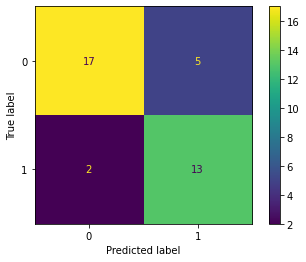

In [43]:
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
plot_confusion_matrix(clf, X_test, y_test)
plt.show()